# Map Plots

In [1]:
%pylab
%matplotlib inline

import os
import pandas as pd
import seaborn as sns
sns.set_context('talk')

# Additional imports
import geopandas as gpd

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
og_data_loc = "original_data"
geo_data_dir = "geodata"
shape_dir = os.path.join(geo_data_dir, "shape_counties")


In [3]:
geo_data = gpd.read_file(os.path.join(shape_dir,"County_Boundaries_in_Minnesota.shp"))

# print data
geo_data

,COUNTY_NAM,COUNTY_COD,COUNTY_FIP,COUNTY_GNI,ATP_CODE,SHAPE_Leng,SHAPE_Area,geometry
0,Red Lake,63,125,659508,2,160725.772889,1.121199e+09,"POLYGON ((254267.489 5317428.819, 254535.947 5..."
1,Hennepin,27,053,659472,M,189829.833881,1.570490e+09,"POLYGON ((460790.980 5009684.501, 460860.420 5..."
2,Stearns,73,145,659517,3,280898.930397,3.598882e+09,"POLYGON ((333638.162 5071100.279, 333638.183 5..."
3,Sherburne,71,141,659515,3,163652.509384,1.166967e+09,"POLYGON ((419160.274 5045580.789, 419800.700 5..."
4,Murray,51,101,659496,8,173803.047160,1.864170e+09,"POLYGON ((302069.198 4857932.176, 302069.141 4..."
...,...,...,...,...,...,...,...,...
82,Norman,54,107,659499,2,247097.098586,2.272880e+09,"POLYGON ((223954.745 5267125.892, 225542.470 5..."
83,Goodhue,25,049,659470,6,233063.117780,2.020004e+09,"POLYGON ((530126.980 4941870.820, 530114.720 4..."
84,Dakota,19,037,659464,M,188056.213349,1.517535e+09,"POLYGON ((492821.770 4974434.601, 492823.170 4..."
85,Faribault,22,043,659467,7,173942.500141,1.868579e+09,"POLYGON ((407752.220 4855630.841, 409291.210 4..."


In [4]:
# create a representative point 
# geo_data["center"] = geo_data["geometry"].apply(lambda x: x.representative_point().coords[:])

<AxesSubplot:>

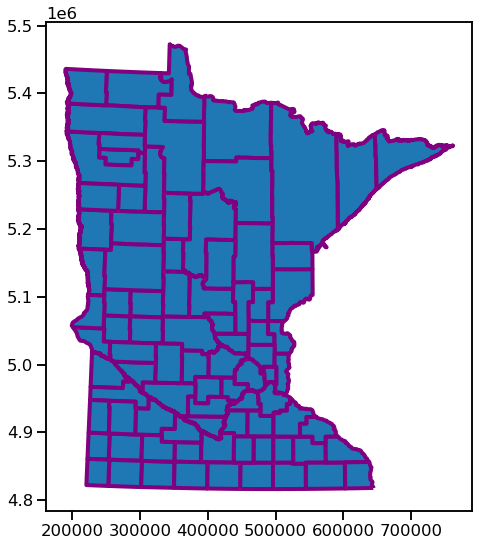

In [5]:
# Plot
# Set up a uniform fig/ax pair to be used in advance.
fig,ax = plt.subplots(1,1, figsize=(12,9))

geo_data.plot( 
#     facecolor=[0.9,0.9,0.9], # Color of counties
    edgecolor=[0.5,0.,0.5],    # Color of counties boundaries
    linewidth= 4, # linewitdh of the boundaries
    ax=ax,
    zorder = 100
)


In [6]:
mn_all = pd.read_csv(os.path.join(og_data_loc, "allmn.csv"), low_memory = False)

In [7]:
mn_all_2019 = mn_all[ mn_all["sentyear"] == 2019]

In [8]:
mn_all_2019

,sentyear,district,county,dcnum,count,sentord,order,sex,race,Agecat,...,reason3,reason4,preason1,preason2,preason3,region,presumptlife,presumptlifeid,lifeminmonths,DispType
0,2019,5,42,CR18945,1.0,1.0,1.0,1,2,3,...,0,0,0.0,0.0,0.0,4,0,0,0,3
1,2019,10,2,CR185398,1.0,1.0,1.0,1,2,5,...,0,0,0.0,0.0,0.0,3,0,0,0,2
2,2019,10,2,CR192286,1.0,1.0,1.0,1,1,3,...,0,0,442.0,470.0,0.0,3,0,0,0,4
3,2019,7,3,CR181303,1.0,1.0,1.0,1,1,5,...,0,0,0.0,0.0,0.0,4,0,0,0,3
4,2019,9,4,CR192555,1.0,1.0,1.0,1,1,5,...,0,0,0.0,0.0,0.0,4,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17330,2019,7,73,CR182256,1.0,1.0,1.0,1,2,5,...,0,0,0.0,0.0,0.0,4,0,0,0,1
17331,2019,7,73,CR174557,1.0,1.0,1.0,1,2,6,...,0,0,0.0,0.0,0.0,4,0,0,0,1
17332,2019,7,73,CR182032,1.0,1.0,1.0,1,1,5,...,0,0,0.0,0.0,0.0,4,0,0,0,1
17333,2019,7,73,CR174551,4.0,1.0,1.0,1,2,6,...,0,0,440.0,0.0,0.0,4,0,0,0,1


In [9]:
def make_meta_map():
    # read in the data
    df_meta = pd.read_excel("original_data/MNCodebook.xlsx",
                            sheet_name='Variable Values',skiprows=1)
    df_meta = df_meta.fillna(method='ffill')
    # initialize the dictionary
    meta_map = {}
    # populate dictionary
    for idx in range(df_meta.shape[0]):
        name_tmp = df_meta.iloc[idx,0]
        if name_tmp == 'Offense':
            value_tmp = float(df_meta.iloc[idx,1])
        else:
            value_tmp = int(df_meta.iloc[idx,1])
        label_tmp = df_meta.iloc[idx,2]
        if name_tmp not in list(meta_map):
            meta_map[name_tmp] = {}
        meta_map[name_tmp][value_tmp] = label_tmp 
    return meta_map

In [10]:
meta_map = make_meta_map()

In [11]:
mn_all_2019.replace(to_replace=meta_map)

,sentyear,district,county,dcnum,count,sentord,order,sex,race,Agecat,...,reason3,reason4,preason1,preason2,preason3,region,presumptlife,presumptlifeid,lifeminmonths,DispType
0,2019,5,Lyon,CR18945,1.0,1.0,1.0,male,Black,22-25,...,0,0,0.0,0.0,0.0,Greater MN,No,0,0,3
1,2019,10,Anoka,CR185398,1.0,1.0,1.0,male,Black,31-40,...,0,0,0.0,0.0,0.0,Oth Metro,No,0,0,2
2,2019,10,Anoka,CR192286,1.0,1.0,1.0,male,White,22-25,...,0,0,442.0,470.0,0.0,Oth Metro,No,0,0,4
3,2019,7,Becker,CR181303,1.0,1.0,1.0,male,White,31-40,...,0,0,0.0,0.0,0.0,Greater MN,No,0,0,3
4,2019,9,Beltrami,CR192555,1.0,1.0,1.0,male,White,31-40,...,0,0,0.0,0.0,0.0,Greater MN,No,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17330,2019,7,Stearns,CR182256,1.0,1.0,1.0,male,Black,31-40,...,0,0,0.0,0.0,0.0,Greater MN,No,0,0,1
17331,2019,7,Stearns,CR174557,1.0,1.0,1.0,male,Black,41-50,...,0,0,0.0,0.0,0.0,Greater MN,No,0,0,1
17332,2019,7,Stearns,CR182032,1.0,1.0,1.0,male,White,31-40,...,0,0,0.0,0.0,0.0,Greater MN,No,0,0,1
17333,2019,7,Stearns,CR174551,4.0,1.0,1.0,male,Black,41-50,...,0,0,440.0,0.0,0.0,Greater MN,No,0,0,1


mn_all_2019

In [12]:
geo_data_alpha = geo_data.sort_values("COUNTY_NAM")

In [13]:
geo_data_alpha

,COUNTY_NAM,COUNTY_COD,COUNTY_FIP,COUNTY_GNI,ATP_CODE,SHAPE_Leng,SHAPE_Area,geometry
59,Aitkin,01,001,663198,1,313180.504387,5.163154e+09,"POLYGON ((446808.523 5208678.535, 446825.768 5..."
67,Anoka,02,003,659447,M,153612.721298,1.153949e+09,"POLYGON ((464804.990 5029001.981, 466383.010 5..."
35,Becker,03,005,659448,4,253751.246517,3.743689e+09,"POLYGON ((265880.135 5226671.629, 265880.324 5..."
29,Beltrami,04,007,659449,2,429488.464514,7.911909e+09,"POLYGON ((330419.310 5378875.110, 331906.030 5..."
28,Benton,05,009,659450,3,147022.135447,1.069361e+09,"POLYGON ((405265.210 5075110.639, 406898.521 5..."
...,...,...,...,...,...,...,...,...
11,Watonwan,83,165,659527,7,136544.886045,1.138512e+09,"POLYGON ((356050.111 4885476.441, 357652.510 4..."
56,Wilkin,84,167,659528,4,270716.067488,1.947397e+09,"POLYGON ((221736.952 5170529.786, 222062.803 5..."
37,Winona,85,169,659529,6,184864.196301,1.660459e+09,"POLYGON ((589888.290 4893943.799, 590562.419 4..."
50,Wright,86,171,659530,3,220541.765616,1.849487e+09,"POLYGON ((418853.379 5029504.459, 418907.890 5..."


In [14]:
# Add Judicial District information to the geo_dataset
import jud_districts


In [15]:
jd_df_sorted = jud_districts.df.sort_values("COUNTY_NAM")
jd_df_sorted

,JUD_DISTR,COUNTY_NAM,JD_NO,JD_COD
62,Ninth District,Aitkin,9,09
79,Tenth District,Anoka,10,10
39,Seventh District,Becker,7,07
63,Ninth District,Beltrami,9,09
40,Seventh District,Benton,7,07
...,...,...,...,...
34,Fifth District,Watonwan,5,05
60,Eighth District,Wilkin,8,08
18,Third District,Winona,3,03
86,Tenth District,Wright,10,10


In [16]:

jd_df_sorted.set_index("COUNTY_NAM", inplace=True)
geo_data_alpha.set_index("COUNTY_NAM", inplace = True)


In [17]:
geo_data_alpha = geo_data_alpha.join(jd_df_sorted)

In [18]:
# Save the jud_data
jd_geo_dir = os.path.join("generated_data","JudicialDistrict_Geo_Data")

geo_data_alpha.to_file(
    os.path.join(jd_geo_dir,"JudicialDistrict_Geo_Data.shp")
)

In [19]:
## Make the plot with judicial district

In [20]:
# geo_data_alpha = gpd.read_file(os.path.join(jd_geo_dir,"JudicialDistrict_Geo_Data.shp"))

In [21]:
geo_data_alpha.index

Index(['Aitkin', 'Anoka', 'Becker', 'Beltrami', 'Benton', 'Big Stone',
       'Blue Earth', 'Brown', 'Carlton', 'Carver', 'Cass', 'Chippewa',
       'Chisago', 'Clay', 'Clearwater', 'Cook', 'Cottonwood', 'Crow Wing',
       'Dakota', 'Dodge', 'Douglas', 'Faribault', 'Fillmore', 'Freeborn',
       'Goodhue', 'Grant', 'Hennepin', 'Houston', 'Hubbard', 'Isanti',
       'Itasca', 'Jackson', 'Kanabec', 'Kandiyohi', 'Kittson', 'Koochiching',
       'Lac qui Parle', 'Lake', 'Lake of the Woods', 'Le Sueur', 'Lincoln',
       'Lyon', 'Mahnomen', 'Marshall', 'Martin', 'McLeod', 'Meeker',
       'Mille Lacs', 'Morrison', 'Mower', 'Murray', 'Nicollet', 'Nobles',
       'Norman', 'Olmsted', 'Otter Tail', 'Pennington', 'Pine', 'Pipestone',
       'Polk', 'Pope', 'Ramsey', 'Red Lake', 'Redwood', 'Renville', 'Rice',
       'Rock', 'Roseau', 'Scott', 'Sherburne', 'Sibley', 'St. Louis',
       'Stearns', 'Steele', 'Stevens', 'Swift', 'Todd', 'Traverse', 'Wabasha',
       'Wadena', 'Waseca', 'Washington'

In [22]:
def county_union(mydf, col = "geometry"):
    from shapely.ops import cascaded_union  # i guess

    multi_poly = cascaded_union( mydf[col] )
    gs = gpd.GeoSeries( multi_poly )
    return gs

In [23]:
# # Plot
# # Set up a uniform fig/ax pair to be used in advance.
# fig,ax = plt.subplots(1,1, figsize=(12,9))

# geo_data_alpha.plot( 
# #     facecolor=[0.9,0.9,0.9], # Color of counties
# #     edgecolor=[0.5,0.,0.5],    # Color of counties boundaries
#     linewidth= 2, # linewitdh of the boundaries
#     ax=ax,
# #     zorder = 100
# )

# for j,(district,dfsub) in enumerate( geo_data_alpha.groupby('JUD_DISTR') ):
#     # j: counter variable
#     geoseries = county_union(dfsub)
#     color = list( plt.cm.tab10(j) )
# #    color[3] = 0.4  # alpha channel (transparency)
#     geoseries.plot( color=color, ax=ax, edgecolor='k', linewidth=4 )

# fig.savefig("District_Plot.png")

In [24]:
gang_counts = pd.read_csv(
    os.path.join("generated_data","Gang_related_county.csv"), index_col=False)

In [25]:
gang_counts = gang_counts.astype({"COUNTY_NAM": str, "GANG_CNT": str})
type(gang_counts["GANG_CNT"].iloc[0])

str

In [26]:
gang_counts.set_index("COUNTY_NAM", inplace = True)
gang_counts

,GANG_CNT
COUNTY_NAM,
Aitkin,0
Anoka,8
Becker,0
Beltrami,1
Benton,0
...,...
Watonwan,0
Wilkin,0
Winona,1


In [27]:
geo_data_alpha = geo_data_alpha.join(gang_counts)

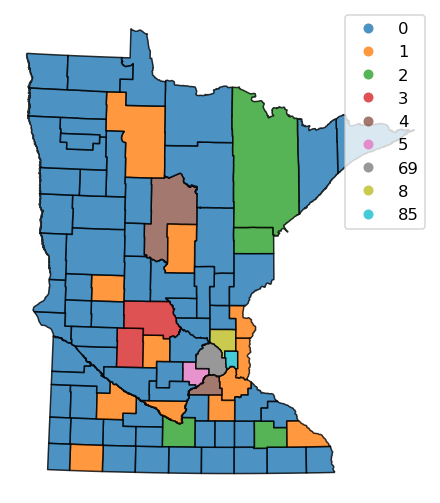

In [28]:
fig, ax = plt.subplots(1,1, figsize = (12, 9))
# for j,(district,dfsub) in enumerate( geo_data_alpha.groupby('JUD_DISTR') ):
#     # j: counter variable
#     geoseries = county_union(dfsub)
#     color = list( plt.cm.tab10(j) )
# #    color[3] = 0.4  # alpha channel (transparency)
#     geoseries.plot( color=color, ax=ax, edgecolor='k', linewidth = 4 )

geo_data_alpha.plot(
    column='GANG_CNT',
    cmap=plt.cm.tab10,
    alpha=0.8,
    edgecolor='k',
#     vmin=0, #geo_data_alpha["GANG_CNT"].min(),
#     vmax=1, #geo_data_alpha["GANG_CNT"].max(),   # arbitrary; based on observed values.
    ax=ax,
    legend=True,
#     legend_kwds={'label': "No. of Gang Related cases"},
#     zorder=100  # want this on top.
)
for s in ax.spines.values():
    s.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

fig.savefig("GangCases_per_County.png")

In [29]:
mn_all = pd.read_csv(
    os.path.join("original_data","allmn.csv"), index_col=False, low_memory=False)

In [30]:
mn_all["plea"] /= 2
mn_all["plea"] -= 0.5
mn_all["plea"] *= 2
mn_all["plea"]
# mn_all["county"].isnull().any()

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
294462    1.0
294463    0.0
294464    0.0
294465    0.0
294466    0.0
Name: plea, Length: 294467, dtype: float64

In [31]:
plea_county = mn_all.groupby("county")["plea"].mean()*100

In [32]:
plea_county_df = pd.DataFrame()
plea_county_df["NOT_GLTY"] = plea_county
plea_county_df["COUNTY_NAM"] = geo_data_alpha.index
plea_county_df.set_index("COUNTY_NAM", inplace=True)
# plea_county_df.sort_index(inplace=True)

In [33]:
plea_county_df

,NOT_GLTY
COUNTY_NAM,
Aitkin,2.403846
Anoka,1.518707
Becker,3.187251
Beltrami,2.897351
Benton,2.639633
...,...
Watonwan,5.124654
Wilkin,7.746479
Winona,2.091021


In [34]:
geo_data_plea = geo_data_alpha.join(plea_county_df)

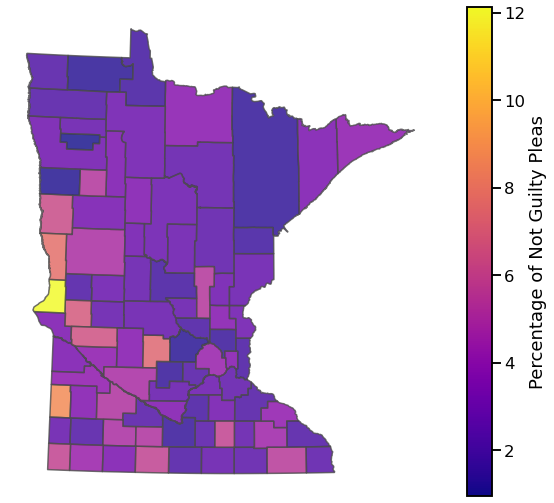

In [35]:
fig, ax = plt.subplots(1,1, figsize = (12, 9))
# for j,(district,dfsub) in enumerate( geo_data_alpha.groupby('JUD_DISTR') ):
#     # j: counter variable
#     geoseries = county_union(dfsub)
#     color = list( plt.cm.tab10(j) )
# #    color[3] = 0.4  # alpha channel (transparency)
#     geoseries.plot( color=color, ax=ax, edgecolor='k', linewidth = 4 )

geo_data_plea.plot(
    column='NOT_GLTY',
    cmap=plt.cm.plasma,
    alpha=0.8,
    edgecolor=[0.3,0.3,0.3],
#     vmin=0, #geo_data_alpha["GANG_CNT"].min(),
#     vmax=1, #geo_data_alpha["GANG_CNT"].max(),   # arbitrary; based on observed values.
    ax=ax,
    legend=True,
    legend_kwds={'label': "Percentage of Not Guilty Pleas"},
    zorder=100  # want this on top.
)
for s in ax.spines.values():
    s.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
fig.savefig("NotGuilty_Map.png")

In [36]:
jail_county = mn_all.groupby("county")["prison"].mean()
jail_county_df = pd.DataFrame()
jail_county_df["PRISON"] = jail_county
jail_county_df["COUNTY_NAM"] = geo_data_alpha.index
jail_county_df.set_index("COUNTY_NAM", inplace=True)
# plea_county_df.sort_index(inplace=True)

In [37]:
geo_data_prison = geo_data_alpha.join(jail_county_df)

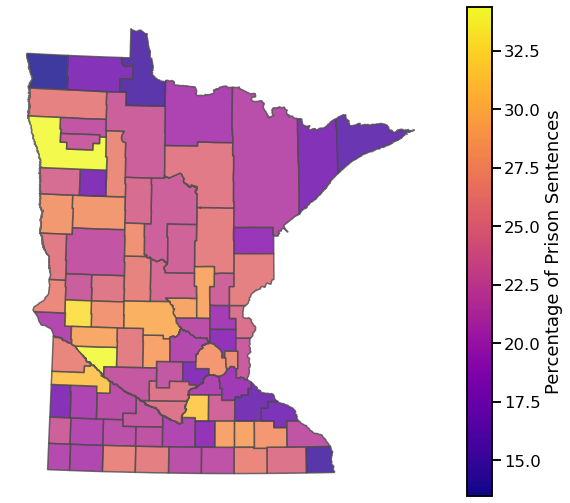

In [38]:
fig, ax = plt.subplots(1,1, figsize = (12, 9))
# for j,(district,dfsub) in enumerate( geo_data_alpha.groupby('JUD_DISTR') ):
#     # j: counter variable
#     geoseries = county_union(dfsub)
#     color = list( plt.cm.tab10(j) )
# #    color[3] = 0.4  # alpha channel (transparency)
#     geoseries.plot( color=color, ax=ax, edgecolor='k', linewidth = 4 )

geo_data_prison.plot(
    column='PRISON',
    cmap=plt.cm.plasma,
    alpha=0.8,
    edgecolor=[0.3,0.3,0.3],
#     vmin=0, #geo_data_alpha["GANG_CNT"].min(),
#     vmax=1, #geo_data_alpha["GANG_CNT"].max(),   # arbitrary; based on observed values.
    ax=ax,
    legend=True,
    legend_kwds={'label': "Percentage of Prison Sentences"},
    zorder=100  # want this on top.
)
for s in ax.spines.values():
    s.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
fig.savefig("Prison_Map.png")

In [39]:
mn_all["detention"] = 0.5 *(mn_all["jail"] + mn_all["prison"])

In [40]:
mn_all["prison"]

0           0
1           0
2           0
3           0
4           0
         ... 
294462    100
294463      0
294464    100
294465    100
294466      0
Name: prison, Length: 294467, dtype: int64

In [41]:
notserv_counts = pd.read_csv(
    os.path.join("generated_data","notserved_county.csv"), index_col=0)
notserv_counts

,NOTIN_PCNT
COUNTY_NAM,
Aitkin,7.77
Anoka,7.28
Becker,2.75
Beltrami,6.68
Benton,2.60
...,...
Watonwan,12.60
Wilkin,6.69
Winona,24.60


In [42]:
geo_data_serv = geo_data_alpha.join(notserv_counts)
geo_data_serv

,COUNTY_COD,COUNTY_FIP,COUNTY_GNI,ATP_CODE,SHAPE_Leng,SHAPE_Area,geometry,JUD_DISTR,JD_NO,JD_COD,GANG_CNT,NOTIN_PCNT
COUNTY_NAM,,,,,,,,,,,,
Aitkin,01,001,663198,1,313180.504387,5.163154e+09,"POLYGON ((446808.523 5208678.535, 446825.768 5...",Ninth District,9,09,0,7.77
Anoka,02,003,659447,M,153612.721298,1.153949e+09,"POLYGON ((464804.990 5029001.981, 466383.010 5...",Tenth District,10,10,8,7.28
Becker,03,005,659448,4,253751.246517,3.743689e+09,"POLYGON ((265880.135 5226671.629, 265880.324 5...",Seventh District,7,07,0,2.75
Beltrami,04,007,659449,2,429488.464514,7.911909e+09,"POLYGON ((330419.310 5378875.110, 331906.030 5...",Ninth District,9,09,1,6.68
Benton,05,009,659450,3,147022.135447,1.069361e+09,"POLYGON ((405265.210 5075110.639, 406898.521 5...",Seventh District,7,07,0,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...
Watonwan,83,165,659527,7,136544.886045,1.138512e+09,"POLYGON ((356050.111 4885476.441, 357652.510 4...",Fifth District,5,05,0,12.60
Wilkin,84,167,659528,4,270716.067488,1.947397e+09,"POLYGON ((221736.952 5170529.786, 222062.803 5...",Eighth District,8,08,0,6.69
Winona,85,169,659529,6,184864.196301,1.660459e+09,"POLYGON ((589888.290 4893943.799, 590562.419 4...",Third District,3,03,1,24.60


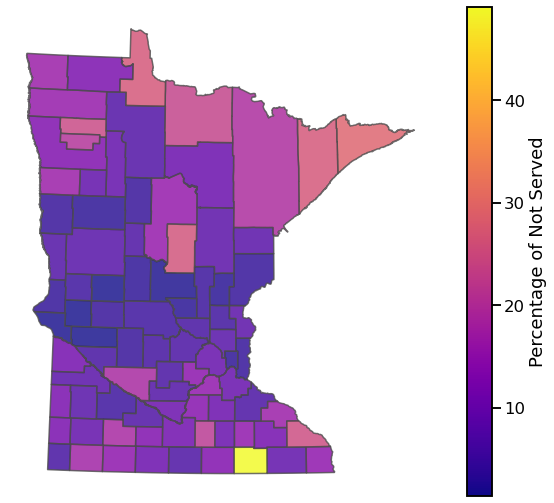

In [43]:
fig, ax = plt.subplots(1,1, figsize = (12, 9))
# for j,(district,dfsub) in enumerate( geo_data_alpha.groupby('JUD_DISTR') ):
#     # j: counter variable
#     geoseries = county_union(dfsub)
#     color = list( plt.cm.tab10(j) )
# #    color[3] = 0.4  # alpha channel (transparency)
#     geoseries.plot( color=color, ax=ax, edgecolor='k', linewidth = 4 )

geo_data_serv.plot(
    column='NOTIN_PCNT',
    cmap=plt.cm.plasma,
    alpha=0.8,
    edgecolor=[0.3,0.3,0.3],
#     vmin=0, #geo_data_alpha["GANG_CNT"].min(),
#     vmax=1, #geo_data_alpha["GANG_CNT"].max(),   # arbitrary; based on observed values.
    ax=ax,
    legend=True,
    legend_kwds={'label': "Percentage of Not Served"},
    zorder=100  # want this on top.
)
for s in ax.spines.values():
    s.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
fig.savefig("NotServed_Map.png")

In [47]:
census_data = pd.read_csv(
    os.path.join("original_data","census_data_2019.csv"))
census_data

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
0,50,27,1,Minnesota,Aitkin County,1,0,16202,8205,7997,...,69,58,6,4,14,11,2,3,1,0
1,50,27,1,Minnesota,Aitkin County,1,1,778,420,358,...,15,5,0,0,3,2,0,0,0,0
2,50,27,1,Minnesota,Aitkin County,1,2,797,413,384,...,11,7,0,0,2,0,0,0,0,0
3,50,27,1,Minnesota,Aitkin County,1,3,812,404,408,...,5,6,1,1,2,3,0,0,0,0
4,50,27,1,Minnesota,Aitkin County,1,4,822,423,399,...,7,7,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19831,50,27,173,Minnesota,Yellow Medicine County,12,14,585,325,260,...,1,5,0,0,0,0,0,0,0,1
19832,50,27,173,Minnesota,Yellow Medicine County,12,15,404,188,216,...,1,2,0,0,0,0,0,0,0,0
19833,50,27,173,Minnesota,Yellow Medicine County,12,16,350,172,178,...,2,0,0,0,0,0,0,0,0,0
19834,50,27,173,Minnesota,Yellow Medicine County,12,17,274,131,143,...,0,0,0,0,0,0,0,0,0,0


In [48]:
census_data.columns

Index(['SUMLEV', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'YEAR', 'AGEGRP',
       'TOT_POP', 'TOT_MALE', 'TOT_FEMALE', 'WA_MALE', 'WA_FEMALE', 'BA_MALE',
       'BA_FEMALE', 'IA_MALE', 'IA_FEMALE', 'AA_MALE', 'AA_FEMALE', 'NA_MALE',
       'NA_FEMALE', 'TOM_MALE', 'TOM_FEMALE', 'WAC_MALE', 'WAC_FEMALE',
       'BAC_MALE', 'BAC_FEMALE', 'IAC_MALE', 'IAC_FEMALE', 'AAC_MALE',
       'AAC_FEMALE', 'NAC_MALE', 'NAC_FEMALE', 'NH_MALE', 'NH_FEMALE',
       'NHWA_MALE', 'NHWA_FEMALE', 'NHBA_MALE', 'NHBA_FEMALE', 'NHIA_MALE',
       'NHIA_FEMALE', 'NHAA_MALE', 'NHAA_FEMALE', 'NHNA_MALE', 'NHNA_FEMALE',
       'NHTOM_MALE', 'NHTOM_FEMALE', 'NHWAC_MALE', 'NHWAC_FEMALE',
       'NHBAC_MALE', 'NHBAC_FEMALE', 'NHIAC_MALE', 'NHIAC_FEMALE',
       'NHAAC_MALE', 'NHAAC_FEMALE', 'NHNAC_MALE', 'NHNAC_FEMALE', 'H_MALE',
       'H_FEMALE', 'HWA_MALE', 'HWA_FEMALE', 'HBA_MALE', 'HBA_FEMALE',
       'HIA_MALE', 'HIA_FEMALE', 'HAA_MALE', 'HAA_FEMALE', 'HNA_MALE',
       'HNA_FEMALE', 'HTOM_MALE', 'HTOM_FEMALE